In [1]:
# Word2Vec model (word embeddings).
from gensim.models import Word2Vec

# This summarizer is based on the improved "TextRank" algorithm, and uses "BM25 ranking function".
from gensim.summarization import summarize, keywords

# Four different algorithms: usual TextRank, LSA, Kullback–Leibler, LexRank.
from sumy.summarizers.text_rank import TextRankSummarizer as TextRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.summarizers.kl import KLSummarizer as KL
from sumy.summarizers.lex_rank import LexRankSummarizer as LRS

# Used for text preprocessing.
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

# ROUGE - set of metrics used for evaluating automatic summarization.
import sumy.evaluation.rouge as Rogue

# Using for search cosine similarity between documents - articles.
from sklearn.metrics.pairwise import cosine_similarity

# Term Frequency – Inverse Document Frequency (TF – IDF).
from sklearn.feature_extraction.text import TfidfVectorizer

# t-distributed Stochastic Neighbor Embedding.
from sklearn.manifold import TSNE

# Used for text preprocessing and part of speech tagging.
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

# Download NLTK corpuses.
nltk.download("stopwords")
nltk.download('wordnet')

import os
import string

# Used for data representation.
import pandas as pd
import numpy as np

# Used for visualisation.
import matplotlib.pyplot as plt
import pylab as pyl
from mpl_toolkits.mplot3d import axes3d

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kvoronaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kvoronaya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
PATH_TEST_SET = 'G:/big_data_industrial/big_data_industrial/test_set/'

#### -------------------------- Text Preprocessing ---------------------------------------------------------------------------------------------------------------------

In [3]:
file_name_mapping = {}
test_set = []
count = 0

for file in os.listdir(PATH_TEST_SET):
    if file.endswith(".txt"):
        file_name_mapping[count] = file
        count += 1
        f = open(PATH_TEST_SET + file, 'r')
        for line in f:
            line = line.decode("ascii","ignore")
            # document should always contain only one line
            test_set.append(line)

print('***** File Name Mapping *****')           
for k, v in file_name_mapping.items():
    print('{}: "{}"'.format(k, v))

***** File Name Mapping *****
0: "before_Big_Data_Analytics_for_Security_Intelligence.txt"
1: "before_Big_Data_Taxonomy.txt"
2: "before_Comment_on_Big_Data_Future_of_Privacy.txt"
3: "before_CSA13-Top10Crypto_.txt"
4: "before_CSCC-Cloud-Customer-Architecture-for-Big-Data-and-Analytics.txt"
5: "iso_ISO-IECJTC1-WG9_N0087_N0087_WD_of_ISOIEC_20546_1st_Edition.txt"
6: "iso_N0147_ISO_IEC_20546_2nd_WorkingDraft_.txt"
7: "iso_N0154_ISO_IEC_20547-3_1st_Working_Draft.txt"
8: "iso_N0200_ISO-IEC_20546_Committee_Draft.txt"
9: "itu_ITU-T-A5-TD-new-Y.txt"
10: "itu_ITUbroshure.txt"
11: "itu_T-REC-Y.3600-201511-I!!PDF-E.txt"
12: "itu_T-REC-Y.Sup40-201607-I!!PDF-E.txt"
13: "nist_NIST.SP.1500-1.txt"
14: "nist_NIST.SP.1500-2.txt"
15: "nist_NIST.SP.1500-4.txt"
16: "nist_NIST.SP.1500-5.txt"
17: "nist_NIST.SP.1500-6.txt"
18: "nist_NIST.SP.1500-7.txt"


In [4]:
def text_preprocessing(test_set):
    prepared_test_set = list()
    for document in test_set:
        
        # tokenization – process of converting a text into tokens
        tokens = word_tokenize(document)
        
        # remove stop-words
        filtered_doc_words = [word for word in tokens if word not in stopwords.words('english')]
        
        # lemmatization process - procedure of obtaining the root form of the word
        wordnet_lemmatizer = WordNetLemmatizer()
        lemmatization_words = []
        for word in filtered_doc_words:
            lemm_word = wordnet_lemmatizer.lemmatize(word)
            lemmatization_words.append(lemm_word)
        
        prepared_doc = ' '.join(lemmatization_words)
        prepared_test_set.append(prepared_doc)
        
    return prepared_test_set

prepared_test_set = text_preprocessing(test_set)    

#### -------------------------- KeyWords extraction ----------------------------------------------------------------------------

In [5]:
number_keywords = 8
keywords_test_set = {}
index = 0

for doc in prepared_test_set:
    extracted_keywords =  keywords(doc, words=number_keywords, scores=True, lemmatize=True)
    keywords_test_set[index] = extracted_keywords
    index += 1


In [6]:
dataframe = list()  
for value in keywords_test_set.values():
    dataframe.append(value)

In [7]:
KEYWORDS = pd.DataFrame(dataframe, columns=['KeyWord & Score']*8)
KEYWORDS

,KeyWord & Score,KeyWord & Score,KeyWord & Score,KeyWord & Score,KeyWord & Score,KeyWord & Score,KeyWord & Score,KeyWord & Score
0,"(data, [0.516541889402])","(security, [0.220244359146])","(big, [0.188203183691])","(informational, [0.151985197596])","(detecting, [0.140941495323])","(attacks, [0.14089581709])","(researchers, [0.132307792272])","(events, [0.126409129861])"
1,"(data, [0.577544795015])","(processed, [0.165415039801])","(databases, [0.142820997512])","(algorithm, [0.12581211284])","(time, [0.121299777294])","(application, [0.113367587131])","(compute, [0.111741544483])","(big, [0.108444076714])"
2,"(data, [0.496967186303])","(privacy, [0.278270545966])","(access, [0.176990130414])","(big, [0.174822980952])","(use, [0.163608677499])","(governing, [0.161987012153])","(analytics, [0.161424719651])","(policy, [0.159496804149])"
3,"(data, [0.5100164821])","(encryption, [0.230962982495])","(cloud, [0.184179919464])","(solution, [0.171719616893])","(privacy, [0.15861662025])","(filter, [0.152037548779])","(policy, [0.127373264338])","(movie, [0.122669243202])"
4,"(data, [0.593762613006])","(analytics, [0.217894497411])","(cloud, [0.215680561138])","(application, [0.169444256629])","(provided, [0.156683717022])","(enterprise, [0.143823337448])","(users, [0.140175383167])","(informational, [0.125384365263])"
5,"(data, [0.565269353882])","(iso, [0.185020558392])","(relation, [0.167607781644])","(standardization, [0.152570456168])","(documents, [0.138935313902])","(big, [0.13555996927])","(computing, [0.121699020753])","(terms, [0.120489527518])"
6,"(data, [0.542267133975])","(iso, [0.192048059691])","(nov, [0.170526881751])","(editors, [0.158867868942])","(standardization, [0.15703937458])","(relation, [0.148925353245])","(big, [0.1397050491])","(computing, [0.134841190519])"
7,"(data, [0.378453724529])","(big, [0.312244320071])","(activity, [0.297870757786])","(provided, [0.219864469599])","(architectural, [0.182263622278])","(function, [0.177137817984])","(role, [0.167319937494])","(component, [0.145334145539])"
8,"(data, [0.664894117785])","(big, [0.162541534481])","(standardization, [0.152758595375])","(processed, [0.14703125563])","(internal, [0.114806989313])","(relational, [0.107513767851])","(computing, [0.106490989409])","(need, [0.106426330561])"
9,"(itu, [0.402800819412])","(referred, [0.360240287017])","(information, [0.227548690584])","(documentation, [0.217633107565])","(group working party, [0.193492935108])",None,None,None


#### -------------------------- TF – IDF matrices and Search cosine similarity between documents ---------------------

In [8]:
# remove morphological affixes from words, leaving only the word stem
stemmer = nltk.stem.porter.PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens, stemmer)
    return stems

# TF-IDF matrix for corpus 
corpus_tfidf = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
corpus_representation = corpus_tfidf.fit_transform(prepared_test_set)

feature = corpus_tfidf.get_feature_names()

corpus_representation_arr = corpus_representation.toarray()

In [9]:
def cosine_similarity_results(query_doc):
    tfidf_query_doc = corpus_tfidf.transform([query_doc])
    tfidf_query_doc = tfidf_query_doc.toarray()
    row_i = []
    for i in xrange(len(prepared_test_set)):
        cosine_dist = cosine_similarity(
            corpus_representation_arr[i].reshape(1,-1), tfidf_query_doc.reshape(1,-1))
        row_i.append(cosine_dist[0][0])

    cosine_sim_data.append(row_i)

    
cosine_sim_data = list()    
for doc in prepared_test_set:
    cosine_similarity_results(doc)
    
    
cosine_sim_data = pd.DataFrame(cosine_sim_data)
cosine_sim_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.663588,0.648583,0.379190,0.622026,0.555717,0.407898,0.530239,0.613775,0.031962,0.583664,0.522433,0.561803,0.660754,0.640200,0.693974,0.645668,0.634399,0.478013
1,0.663588,1.000000,0.648586,0.418512,0.632753,0.645309,0.468064,0.576972,0.718967,0.028837,0.600442,0.585616,0.612317,0.746822,0.723319,0.688153,0.721005,0.741063,0.540083
2,0.648583,0.648586,1.000000,0.447514,0.572629,0.559472,0.406272,0.554645,0.607149,0.021119,0.561516,0.524781,0.574831,0.667106,0.658167,0.721618,0.622470,0.638888,0.485913
3,0.379190,0.418512,0.447514,1.000000,0.429038,0.376429,0.272648,0.332974,0.423821,0.004452,0.365027,0.362849,0.363535,0.446500,0.425879,0.472189,0.419130,0.418562,0.312727
4,0.622026,0.632753,0.572629,0.429038,1.000000,0.595031,0.446737,0.562792,0.678017,0.025978,0.565411,0.613579,0.583802,0.700657,0.681959,0.651651,0.718971,0.709562,0.516782
5,0.555717,0.645309,0.559472,0.376429,0.595031,1.000000,0.782603,0.646314,0.839105,0.063326,0.616187,0.584619,0.649280,0.788180,0.731978,0.634002,0.703899,0.711811,0.576646
6,0.407898,0.468064,0.406272,0.272648,0.446737,0.782603,1.000000,0.510957,0.628386,0.051189,0.450132,0.428247,0.494276,0.570450,0.527878,0.463049,0.517770,0.520612,0.431896
7,0.530239,0.576972,0.554645,0.332974,0.562792,0.646314,0.510957,1.000000,0.664313,0.047301,0.555134,0.622874,0.643302,0.712921,0.752191,0.647357,0.728981,0.767596,0.579645
8,0.613775,0.718967,0.607149,0.423821,0.678017,0.839105,0.628386,0.664313,1.000000,0.049052,0.664465,0.650466,0.696707,0.869862,0.807042,0.698090,0.784735,0.793818,0.624503
9,0.031962,0.028837,0.021119,0.004452,0.025978,0.063326,0.051189,0.047301,0.049052,1.000000,0.114394,0.113093,0.162074,0.039584,0.038821,0.032145,0.035801,0.037791,0.048012


#### -------------------------- Summary by improved "TextRank" --------------------------------------------------

In [14]:
summary_len_words = 120
count = 0

for doc in test_set:
    summary = summarize(doc, word_count=summary_len_words)
    print('\n\n ****************** Summary for doc.#{} ********************* '.format(count))
    count += 1
    print(summary)



 ****************** Summary for doc.#0 ********************* 
The technological advances in storage, processing, and analysis of Big Data include (a) the rapidly decreasing cost  of  storage  and  CPU  power  in  recent  years;  (b)  the  flexibility  and  cost-effectiveness  of  datacenters  and  cloud  computing for elastic computation and storage; and (c) the development of new frameworks such as Hadoop,  which  allow  users  to  take  advantage  of  these  distributed  computing  systems  storing  large  quantities  of  data  through  flexible  parallel  processing.
10      v   CLOUD SECURITY ALLIANCE Big Data Analytics for Security Intelligence   Analyzing logs, network packets, and system events for forensics and intrusion detection has traditionally been a  significant problem; however, traditional technologies fail to provide the tools to support long-term, large-scale  analytics for several reasons:     1.


 ****************** Summary for doc.#1 ********************* 
29   


[SOURCE: ISO/IEC 2382-17:1999, 17.05.08]  3.1.10  streaming data  data passing across an interface from a source that is operating continuously   [SOURCE: ISO/IEC 19784-4:2011]  3.1.11  metadata  data about data or data elements, possibly including their data descriptions, and data about data ownership, access paths, access rights and data volatility  [SOURCE: ISO/IEC 2382-17:1999, 17.06.05]  3.2 Terms Defined in this International Standard  3.2.1  big data  extensive datasets  primarily in the characteristics of volume, variety, velocity, and/or variability  that require a scalable architecture for efficient storage, manipulation, and analysis   NOTE - Big Data is commonly used in many different ways, for example as the name of the scalable technology used to handle big data extensive datasets.


 ****************** Summary for doc.#9 ********************* 
A.5 justification information for draft new Y.3600 (ex Y.BigData-reqts).
Introduction According to ITU procedures, as described 

#### -------------------------- Summaries by algorithms: usual TextRank, LSA, Kullback–Leibler, LexRank ------------------------------------------

In [ ]:
# to regulate the length of summary
SENTENCES_COUNT = 3

stemmer = Stemmer("english")
tr = [0.0, 0.0, 0.0]
lsa = [0.0, 0.0, 0.0]
kl = [0.0, 0.0, 0.0]
lrs = [0.0, 0.0, 0.0]
metrics = [tr, lsa, kl, lrs]
summaries_mapping = {0: 'usual TextRank', 1: 'LSA', 2: 'Kullback–Leibler', 3: 'LexRank'}

for file in os.listdir(PATH_TEST_SET):
    if file.endswith(".txt"):
        print('\n \n ************ Summaries for file {}. ************'.format(file))
        parser = PlaintextParser.from_file(PATH_TEST_SET + file, Tokenizer("english"))
        summarizers = [
            TextRankSummarizer(stemmer), 
            Summarizer(stemmer), 
            KL(stemmer), 
            LRS(stemmer)
        ]
     
        for summarizer in summarizers:
            summarizer.stop_words = get_stop_words("english")
        
        summaries = [[]] * 4
        for i in range(len(summarizers)):
            print('\n --------- Summary by {} algorithm ---------'.format(summaries_mapping[i]))
            for sentence in summarizers[i](parser.document, SENTENCES_COUNT):
                summaries[i].append(sentence)
                print(sentence)

            metrics[i][0] += Rogue.rouge_1(summaries[i], parser.document.sentences)
            metrics[i][1] += Rogue.rouge_2(summaries[i], parser.document.sentences)
            metrics[i][2] += Rogue.rouge_n(summaries[i], parser.document.sentences, 3)


 
 ************ Summaries for file before_Big_Data_Analytics_for_Security_Intelligence.txt. ************

 --------- Summary by usual TextRank algorithm ---------
2013 Cloud Security Alliance - All Rights Reserved.
2013 Cloud Security Alliance - All Rights Reserved.
2013 Cloud Security Alliance - All Rights Reserved.

 --------- Summary by LSA algorithm ---------
For  example,  Big  Data  analytics  can  be  employed  to  analyze  financial  transactions,  log  files,  and  network  traffic  to  identify  anomalies  and  suspicious  activities, and to correlate multiple sources of information into a coherent view.
The  human  analyst  is  given  the  flexibility  of  combining  multiple  sensors  according  to  known  attack  patterns  (e.g.,  command-and-control  communications  followed  by  lateral  movement) to look for abnormal events that may warrant investigation or to generate behavioral reports of a  given users activities across time.
By using a MapReduce implementation, an 

#### -------------------------------- Visualization of documents --------------------------------

In [5]:
stemmer = nltk.stem.porter.PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens, stemmer)
    return stems

# TF-IDF matrix for corpus, extracting 4-grams, max features = 300 
corpus_tfidf = TfidfVectorizer(
    ngram_range=(4,4), stop_words='english', tokenizer=tokenize)
corpus_representation = corpus_tfidf.fit_transform(prepared_test_set)
features= corpus_tfidf.get_feature_names()
corpus_representation_arr = corpus_representation.toarray()

In [6]:
ngramm_representation = corpus_representation_arr.transpose()

In [7]:
ngramm_representation.shape

(83738L, 19L)

In [8]:
ngramm_representation_1 = ngramm_representation[:8000]
ngramm_representation_1.shape

(8000L, 19L)

In [9]:
# similar to PCA method for dimension reduction
newtsne = TSNE(n_components=3, random_state=0)


In [10]:
reduced_matrix_1 = newtsne.fit_transform(ngramm_representation_1)
reduced_matrix_1.shape

(8000L, 3L)

In [11]:
ngramm_representation_2 = ngramm_representation[8000:16000]
ngramm_representation_2.shape

reduced_matrix_2 = newtsne.fit_transform(ngramm_representation_2)
reduced_matrix_2.shape

(8000L, 3L)

In [12]:
ngramm_representation_3 = ngramm_representation[16000:24000]
ngramm_representation_3.shape

reduced_matrix_3 = newtsne.fit_transform(ngramm_representation_3)
reduced_matrix_3.shape

(8000L, 3L)

In [13]:
ngramm_representation_4 = ngramm_representation[24000:32000]
ngramm_representation_4.shape

reduced_matrix_4 = newtsne.fit_transform(ngramm_representation_4)
reduced_matrix_4.shape

(8000L, 3L)

In [14]:
ngramm_representation_5 = ngramm_representation[32000:40000]
ngramm_representation_5.shape

reduced_matrix_5 = newtsne.fit_transform(ngramm_representation_5)
reduced_matrix_5.shape

(8000L, 3L)

In [15]:
reduced_matr = np.concatenate((reduced_matrix_1, reduced_matrix_2, reduced_matrix_3, reduced_matrix_4, reduced_matrix_5), axis=0)

In [16]:
reduced_matr.shape

(40000L, 3L)

In [30]:
mappingfeatures = {}

for i in xrange(19):
    features_presented = []
    doc_raw = enumerate(corpus_representation_arr[i])
    for ngram in doc_raw:
        if ngram[1] > 0.03:
            features_presented.append(ngram[0])
            
    mappingfeatures[i] = features_presented

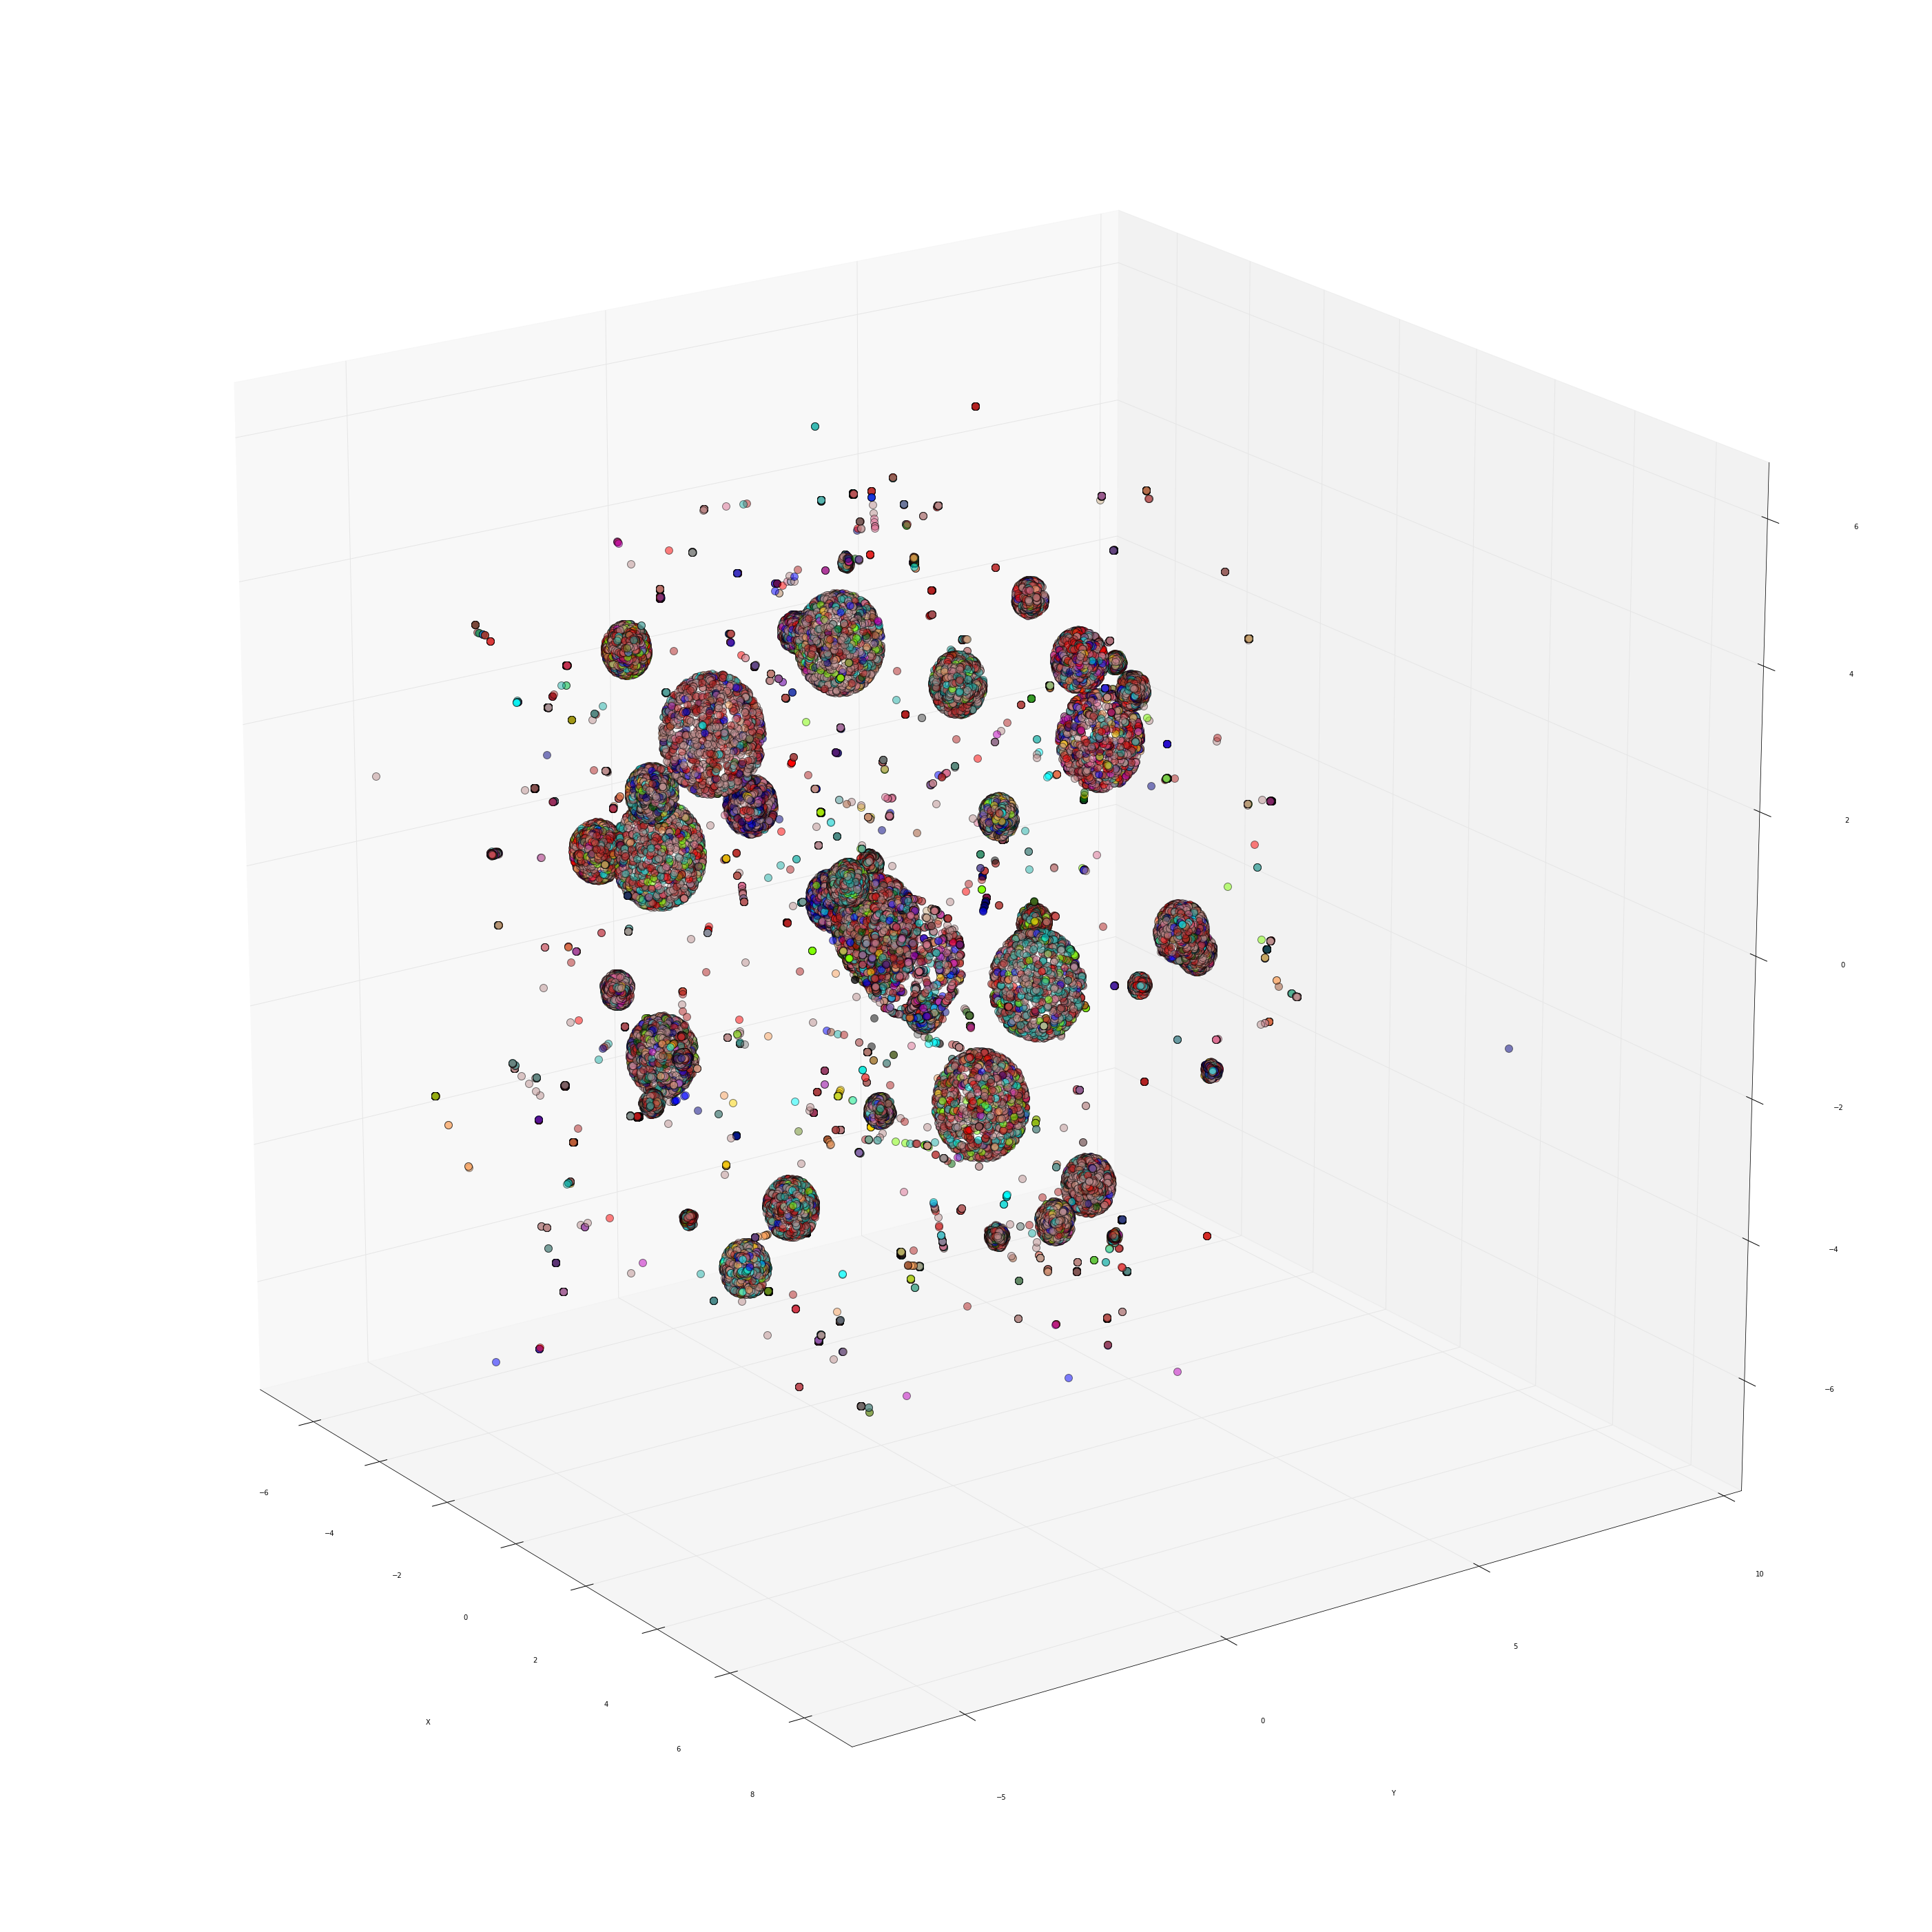

In [33]:
%matplotlib inline
fig = plt.figure(figsize=(50,50))
ax = fig.gca(projection='3d')

N = reduced_matr.shape

for i in xrange(N[0]):
    xs = reduced_matr[i,0]
    ys = reduced_matr[i,1]
    zs = reduced_matr[i,2]
    
    if i in mappingfeatures[0]:
        color = 'black'
        
    if i in mappingfeatures[1]:
        color = 'gray'
        
    if i in mappingfeatures[2]:
        color = 'rosybrown'
        
    if i in mappingfeatures[3]:
        color = 'firebrick'
        
    if i in mappingfeatures[4]:
        color = 'red'
        
    if i in mappingfeatures[5]:
        color = 'sienna'
    
    if i in mappingfeatures[6]:
        color = 'sandybrown'
        
    if i in mappingfeatures[7]:
        color = 'gold'
        
    if i in mappingfeatures[8]:
        color = 'olivedrab'
        
    if i in mappingfeatures[9]:
        color = 'chartreuse'
        
    if i in mappingfeatures[10]:
        color = 'lightseagreen'
        
    if i in mappingfeatures[11]:
        color = 'navy'
        
    if i in mappingfeatures[12]:
        color = 'blue'
        
    if i in mappingfeatures[13]:
        color = 'darkorchid'
        
    if i in mappingfeatures[14]:
        color = 'm'
        
    if i in mappingfeatures[15]:
        color = 'palevioletred'
    
    if i in mappingfeatures[16]:
        color = 'tan'
        
    if i in mappingfeatures[17]:
        color = 'darkgreen'
        
    if i in mappingfeatures[18]:
        color = 'cyan'
        
    s = 120
    marker = 'o'
    label = 'o - means n-gram'        
    ax.scatter(xs, ys, zs, c=color, marker=marker, alpha=0.5, s=s, label=label)


text='N-grams (4-grams) document visualisation,\n based on TF-IDF matrix \n \n'
ax.set_xlim(min(reduced_matr[:,0]), max(reduced_matr[:,0]))
ax.set_ylim(min(reduced_matr[:,1]), max(reduced_matr[:,1]))
ax.set_zlim(min(reduced_matr[:,2]), max(reduced_matr[:,2]))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=20., azim=-35)

plt.show()